In [1]:
import matplotlib.pyplot as plt

from bubblekicker.bubblekicker import (BubbleKicker, batchbubblekicker, bubble_properties_calculate, 
                                       _bubble_properties_filter, bubble_properties_plot)

from bubblekicker.pipelines import CannyPipeline, AdaptiveThresholdPipeline

In [2]:
%matplotlib inline

In [3]:
img = '3411017m_0004.jpg'

### Pipelines testing¶

#### Canny canonical method

{'min': 0.92}
{'max': 1.6, 'min': 0.2}


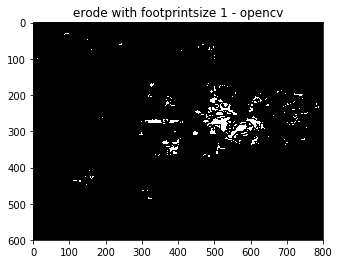

In [4]:
bubbler = CannyPipeline(img, channel='red') #setup the pipeline by loading the file
result = bubbler.run([20, 80], 3, 3, 1, 1)  # executing the pipeline with custom parameters
marker_image, props = bubble_properties_calculate(result)  # extract the properties
#filtered_bubbles = bubble_properties_filter(props)   # filter based on the default filter rules
bubbler.plot();

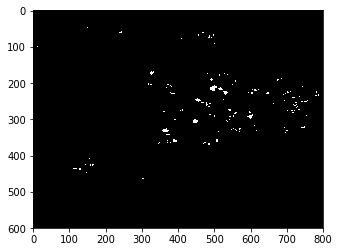

In [5]:
# the filtered bubbles
plt.imshow(marker_image>0, cmap='gray');

Steps undertaken since from raw image:
edge-detect with thresholds 20 -> 80 - opencv
dilate with footprintsize 3 - opencv
fill holes - opencv
clear border with buffer size 3 and bgval 1 -  skimage
erode with footprintsize 1 - opencv




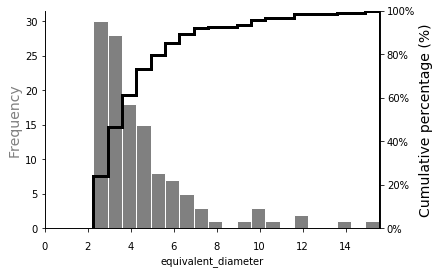

In [6]:
fig, axs = bubble_properties_plot(props, "equivalent_diameter")  # make a plot
bubbler.what_have_i_done()
#plt.savefig('BSDhist.png')

#### Adaptive threshold method

{'min': 0.92}
{'max': 1.6, 'min': 0.2}


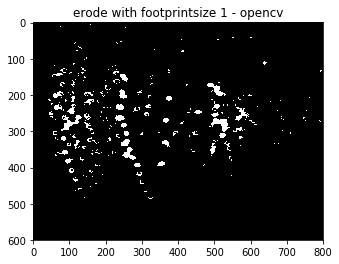

In [7]:
#setup the pipeline by loading the file
bubbler = AdaptiveThresholdPipeline(img, channel='red') 
result = bubbler.run(191, 15, 2, 3, 1, 1)  # executing the pipeline with custom parameters
bubbler.plot() # plot detected bubbbles

marker_image, props = bubble_properties_calculate(result)  # extract the properties 
## nbubbles, to include

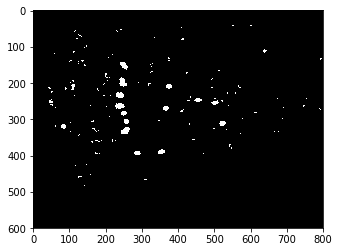

In [8]:
# the filtered bubbles
plt.imshow(marker_image>0, cmap='gray');

Steps undertaken since from raw image:
adaptive threshold bubble detection with blocksize 191 and cvalue 15 - opencv
dilate with footprintsize 2 - opencv
fill holes - opencv
clear border with buffer size 3 and bgval 1 -  skimage
erode with footprintsize 1 - opencv




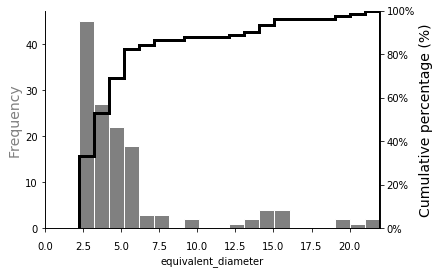

In [9]:
#plt.imshow(marker_image, cmap='Greys',  interpolation='nearest')
fig, axs = bubble_properties_plot(props, "equivalent_diameter")  # make a plot
bubbler.what_have_i_done()

### Custom sequence

#### Canny

Steps undertaken since from raw image:
edge-detect with thresholds 20 -> 80 - opencv
dilate with footprintsize 3 - opencv




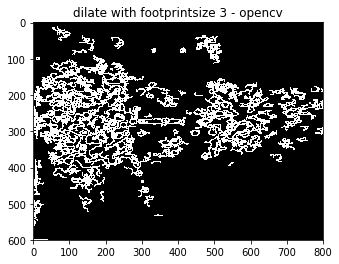

In [10]:
bubbler = BubbleKicker(img, channel='red')
bubbler.edge_detect_canny_opencv([20, 80]) # canny edge detection givin the two parameters to build the gaussian
bubbler.dilate_opencv(3) # dilate using opencv function
bubbler.plot();
bubbler.what_have_i_done()

we can see that too many edges are detected

Steps undertaken since from raw image:
edge-detect with thresholds 120 -> 20 - opencv
dilate with footprintsize 3 - opencv
clear border with buffer size 3 and bgval 1 -  skimage




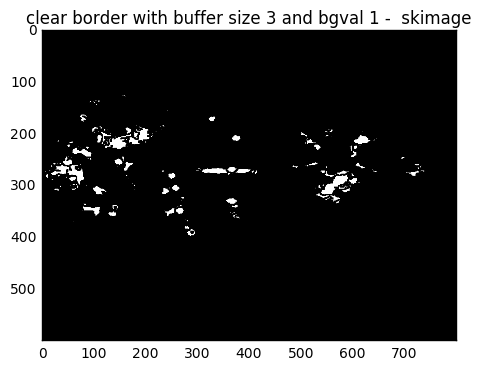

In [115]:
bubbler.reset_to_raw()
bubbler.edge_detect_canny_opencv([120, 20])
bubbler.dilate_opencv(3)
bubbler.clear_border_skimage(3, 1)
bubbler.plot();
bubbler.what_have_i_done()
plt.savefig('cannyPipeline.jpg')

#### Adaptive method

Steps undertaken since from raw image:
adaptive threshold bubble detection with blocksize 401 and cvalue 10 - opencv
clear border with buffer size 3 and bgval 1 -  skimage




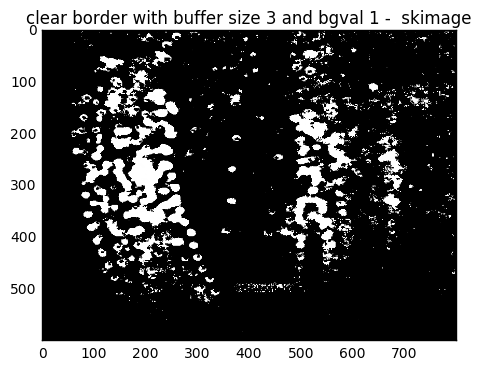

In [116]:
bubbler.reset_to_raw() # here we are running things in default mode
bubbler.adaptive_threshold_opencv(401, 10)
bubbler.clear_border_skimage()
bubbler.plot()
bubbler.what_have_i_done()

### Now we might be ready to go for a batch of images

In [76]:
res = batchbubblekicker('sample_images', 'red',
                        AdaptiveThresholdPipeline,
                        401, 10, 3, 1, 1)

### Bubble properties

#### bubble properties can be returned as a table¶

{'min': 0.92}
{'max': 1.6, 'min': 0.2}


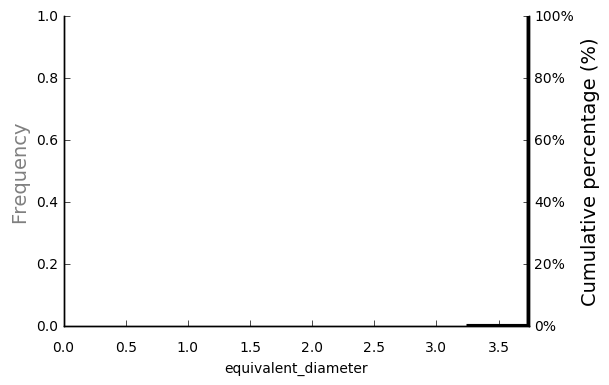

In [84]:
bubbler = CannyPipeline(img, channel='red')
result = bubbler.run([120, 180], 3, 3, 1, 1)
marker_image, props = bubble_properties_calculate(result) #output do add nbubbles, 
#print(nbubbles)
fig, axs = bubble_properties_plot(props, "equivalent_diameter")

In [85]:
props.head()

,area,centroid,convex_area,equivalent_diameter,perimeter,convexity,circularity_reciprocal
label,,,,,,,
3,11,"(273.181818182, 733.272727273)",18,3.74241,11.414214,0.963711,0.942518


##### ...for the ease of object selection and futher filtering, based on default parameters

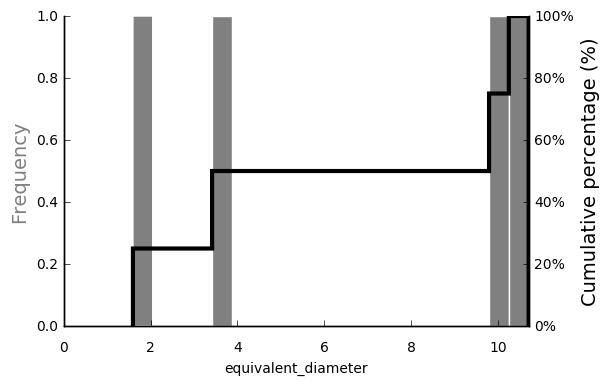

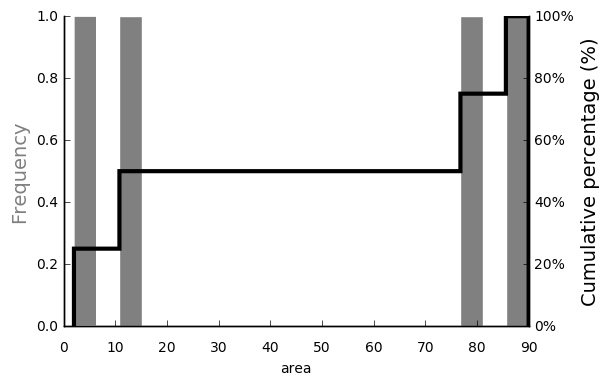

In [86]:
# derive and PLOT the bubble properties as a table with no filter
bubbler = CannyPipeline(img, channel='red')
result = bubbler.run([120, 180], 3, 3, 1, 1)
id_image, props = bubble_properties_calculate(result, rules={})
fig, axs = bubble_properties_plot(props, "equivalent_diameter")
#fig.savefig("examples/output_eq_diameter.png")
fig, axs = bubble_properties_plot(props, "area")
#fig.savefig("examples/output_area.png")

##### filter based on custom parameters

{'min': 1.92}
{'max': 1.6, 'min': 0.2}
       area                        centroid  convex_area  equivalent_diameter  \
label                                                                           
1        59  (200.101694915, 646.406779661)           62             8.667245   
2       156  (202.724358974, 726.679487179)          164            14.093451   
3       133  (205.037593985, 409.571428571)          144            13.013103   
4        62  (221.161290323, 586.709677419)           73             8.884866   
5        74   (222.72972973, 380.216216216)           83             9.706685   

       perimeter  convexity  circularity_reciprocal  
label                                                
1      27.313708   2.160087                1.006235  
2      55.142136   2.829053                1.551075  
3      46.727922   2.846264                1.306446  
4      32.106602   1.931067                1.323083  
5      38.142136   1.940112                1.564474  


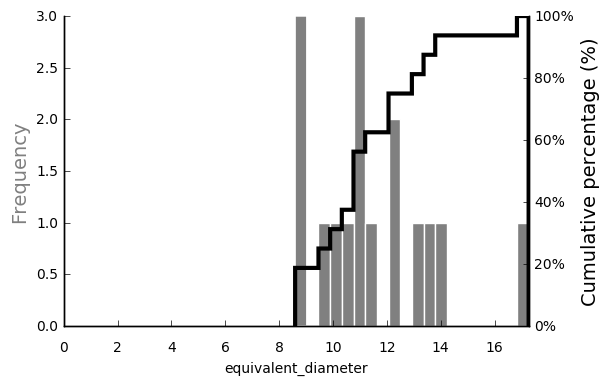

In [87]:
# filter bubble properties based on CUSTOM filter ruleset
custom_filter = {'circularity_reciprocal': {'min': 0.2, 'max': 1.6},
                 'convexity': {'min': 1.92}}
bubbler = CannyPipeline('0325097m_0305.tif', channel='red')
result = bubbler.run([120, 180], 3, 3, 1, 1)
id_image, props = bubble_properties_calculate(result, rules=custom_filter)
print(props.head())
fig, axs = bubble_properties_plot(props, "equivalent_diameter")
plt.show()